In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('/home/tomek/ib_tools')
from saver import ArcticSaver
from utils import plot
from matplotlib import pyplot as plt

/home/tomek/.virtualenvs/ib/lib/python3.8/site-packages/arctic/_util.py:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
/home/tomek/.virtualenvs/ib/lib/python3.8/site-packages/arctic/store/_pandas_ndarray_store.py:6: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import DataFrame, Series, Panel
/home/tomek/.virtualenvs/ib/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
saver = ArcticSaver()

Library created, but couldn't enable sharding: no such command: 'enablesharding', full error: {'ok': 0.0, 'errmsg': "no such command: 'enablesharding'", 'code': 59, 'codeName': 'CommandNotFound'}. This is OK if you're not 'admin'


In [3]:
saver.keys()

['all_bars_20200715_15_51_ESU0',
 'all_bars_20200715_15_51_GCQ0',
 'all_bars_20200715_15_51_NQU0',
 'all_bars_20200715_15_51_YM   SEP 20',
 'all_bars_20200719_23_16_ESU0',
 'all_bars_20200719_23_16_GCQ0',
 'all_bars_20200719_23_16_NQU0',
 'all_bars_20200719_23_16_YM_SEP_20',
 'all_bars_20200721_21_30_ESU0',
 'all_bars_20200721_21_30_GCQ0',
 'all_bars_20200721_21_30_NQU0',
 'all_bars_20200721_21_30_YM_SEP_20',
 'all_bars_20200723_14_21_ESU0',
 'all_bars_20200723_14_21_GCQ0',
 'all_bars_20200723_14_21_NQU0',
 'all_bars_20200723_14_21_YM_SEP_20',
 'all_bars_20200723_17_44_ESU0',
 'all_bars_20200723_17_44_GCQ0',
 'all_bars_20200723_17_44_NQU0',
 'all_bars_20200723_17_44_YM_SEP_20',
 'all_bars_20200724_20_08_ESU0',
 'all_bars_20200724_20_08_GCQ0',
 'all_bars_20200724_20_08_GCZ0',
 'all_bars_20200724_20_08_NQU0',
 'all_bars_20200724_20_08_YM_SEP_20',
 'all_bars_20200803_14_47_GCZ0',
 'all_bars_20200803_14_47_YM_SEP_20',
 'all_bars_20200803_15_17_ESU0',
 'all_bars_20200803_15_17_GCZ0',
 'all_

In [40]:
nq = saver.read('candles_20210307_22_21_NQH1').data
nq.tail(50)

,backfill,open,high,low,close,weighted_price,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,,
2021-03-10 21:15:00,False,12815.25,12836.50,12784.75,12795.25,12807.133088,12795.25,12024,12788.944367,12740.105670,56.173137,0,1.0,0
2021-03-10 21:34:30,False,12795.75,12808.00,12756.75,12758.75,12784.176673,12758.75,12001,12778.879578,12740.413841,55.980073,0,1.0,0
2021-03-10 21:53:00,False,12759.25,12801.00,12758.25,12765.00,12779.761805,12765.00,12474,12774.253052,12740.820224,55.461247,0,1.0,0
2021-03-10 22:00:00,False,12765.00,12772.50,12744.00,12758.50,12755.892245,12758.50,12250,12769.002035,12741.112451,54.403943,0,1.0,0
2021-03-11 01:02:00,False,12758.50,12799.75,12755.75,12778.50,12773.771807,12778.50,12010,12772.168023,12741.730428,53.995945,0,1.0,0
2021-03-11 02:49:00,False,12778.25,12790.50,12724.25,12788.75,12751.875405,12788.75,12342,12777.695349,12742.507611,54.476496,0,1.0,0
2021-03-11 04:19:30,False,12788.25,12848.00,12779.75,12835.00,12819.212896,12835.00,12054,12796.796899,12744.036412,55.016634,0,1.0,0
2021-03-11 07:14:30,False,12836.00,12856.50,12822.00,12827.00,12839.798842,12827.00,12086,12806.864599,12745.407711,54.212060,0,1.0,0
2021-03-11 08:33:30,False,12826.25,12932.75,12824.50,12926.25,12882.933142,12926.25,12018,12846.659733,12748.396841,56.331195,0,1.0,0


In [5]:
nq[(nq['open'] == 0) | (nq['high'] == 0) | (nq['low'] == 0) | (nq['close'] == 0)]

,backfill,open,high,low,close,weighted_price,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,,


In [6]:
nq = saver.read('candles_20210217_14_33_NQH1').data

In [7]:
nq.tail(20)

,backfill,open,high,low,close,weighted_price,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,,
2021-02-19 17:37:00,False,13678.25,13699.75,13675.75,13694.25,13690.706984,13694.25,12221,13678.487106,13642.953808,32.483381,0,1.0,0
2021-02-19 17:52:30,False,13694.00,13696.00,13670.00,13678.75,13685.389444,13678.75,12055,13678.574737,13643.545657,32.229131,0,1.0,0
2021-02-19 18:07:30,False,13679.00,13680.00,13655.50,13659.75,13668.050172,13659.75,12228,13672.299825,13643.813576,31.926027,0,1.0,0
2021-02-19 18:20:00,False,13659.50,13660.00,13627.75,13633.75,13647.862041,13633.75,13060,13659.449883,13643.647188,31.938732,0,1.0,0
2021-02-19 18:29:00,True,13633.50,13639.00,13610.00,13619.00,13621.201887,13619.00,12376,13645.966589,13643.239681,31.823488,0,1.0,0
2021-02-19 18:38:00,True,13618.75,13621.75,13585.25,13587.00,13602.739403,13587.00,12157,13626.311059,13642.309840,32.006880,0,-1.0,0
2021-02-19 18:46:00,False,13587.25,13600.50,13572.75,13598.50,13586.454371,13598.50,12178,13617.040706,13641.585511,31.839944,0,-1.0,0
2021-02-19 18:55:30,False,13599.25,13601.50,13555.00,13559.50,13574.787556,13559.50,12721,13597.860471,13640.228360,32.414848,-1,-1.0,-1
2021-02-19 19:08:30,False,13559.50,13589.00,13550.00,13554.75,13572.810518,13554.75,12983,13583.490314,13638.815119,32.673089,-1,-1.0,-1


In [8]:
df = saver.read('candles_20210207_23_19_YM_MAR_21').data

In [9]:
df.drop(['open', 'high', 'low', 'close', 'weighted_price'], axis=1, inplace=True)

In [10]:
periods = 120

df['ema_s_slow'] = df['price'].pct_change().abs().ewm(span=periods, min_periods=periods/5).mean()
df['vol_slow'] = df['price'].pct_change().ewm(span=periods, min_periods=periods/5).std()
df['strength_slow'] = (df['ema_s_slow'] / df['vol_slow']) * 100
df['strength_slow_smooth'] = df['strength_slow'].rolling(int(periods/3)).mean()

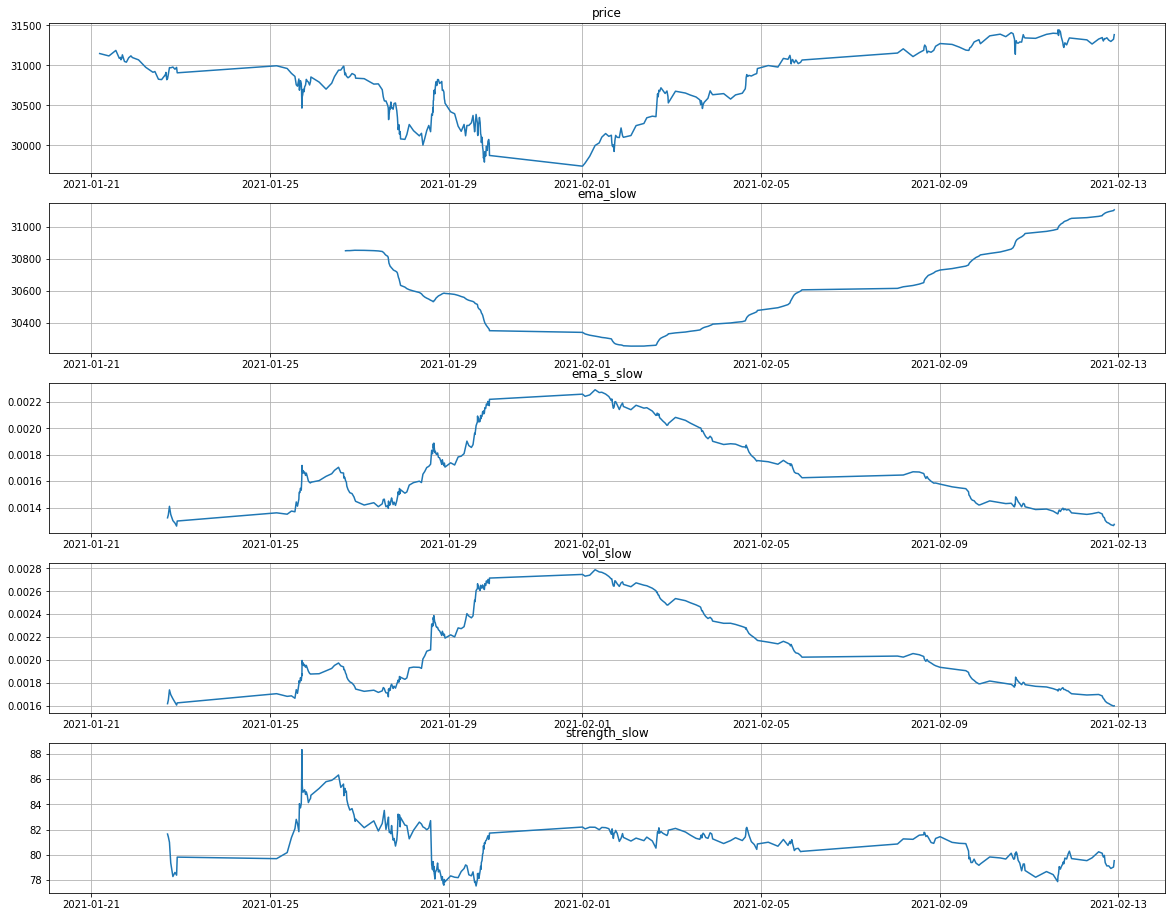

In [11]:
plot(df[['price', 'ema_slow','ema_s_slow','vol_slow','strength_slow']]);

In [12]:
df['strength_slow'].median(), df['strength_slow'].mean()

(81.20860171211318, 81.1014108024308)

In [13]:
df['strength_slow_expanding_median'] = df['strength_slow'].expanding().median()

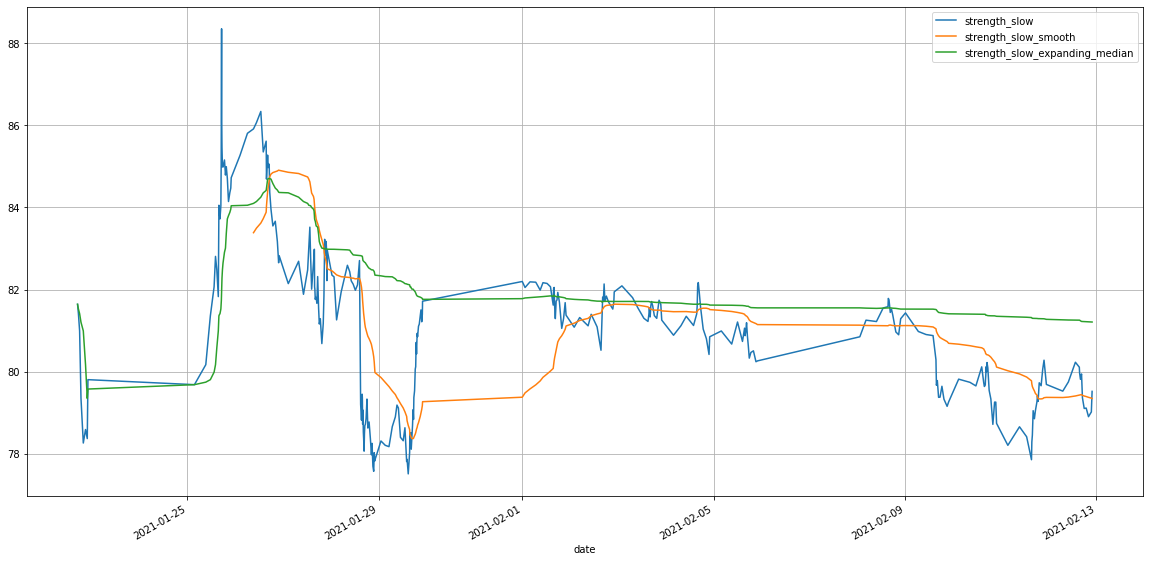

In [14]:
df[['strength_slow', 'strength_slow_smooth', 'strength_slow_expanding_median']].plot(figsize=(20,10), grid=True);

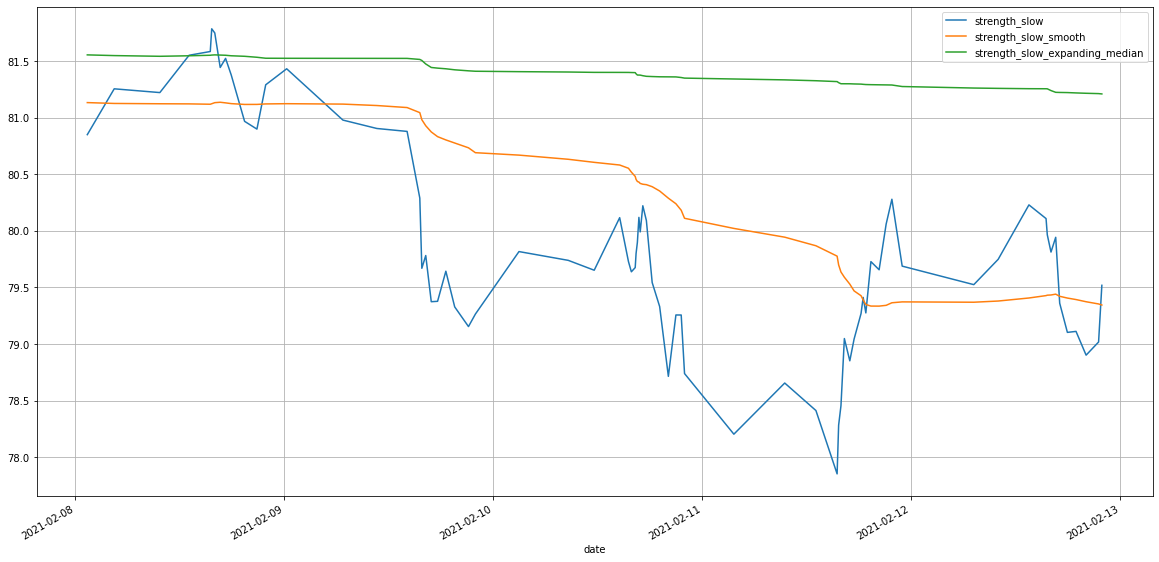

In [15]:
df[['strength_slow', 'strength_slow_smooth', 'strength_slow_expanding_median']].loc['20210208':].plot(figsize=(20,10), grid=True);

In [16]:
df['strength_filter'] = (df['strength_slow'] > df['strength_slow_expanding_median']) 

In [17]:
df.tail()

,backfill,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,ema_s_slow,vol_slow,strength_slow,strength_slow_smooth,strength_slow_expanding_median,strength_filter
date,,,,,,,,,,,,,,,
2021-02-12 17:58:00,False,31346.0,8015,31261.886901,31091.430295,75.832581,0,1.0,0,0.001289,0.001629,79.102567,79.405692,81.220614,False
2021-02-12 18:57:30,False,31317.0,8040,31263.693906,31095.170824,75.525421,0,1.0,0,0.001283,0.001621,79.111306,79.392535,81.217509,False
2021-02-12 20:07:00,False,31300.0,8064,31264.884282,31098.567239,74.642070,0,1.0,0,0.001270,0.001610,78.901538,79.373205,81.214405,False
2021-02-12 21:33:00,False,31328.0,8042,31266.953670,31102.371422,73.636498,0,1.0,0,0.001264,0.001600,79.017484,79.353651,81.211503,False
2021-02-12 21:55:30,False,31385.0,8020,31270.824078,31107.057392,73.493890,0,1.0,0,0.001273,0.001601,79.518296,79.344162,81.208602,False


In [18]:
df['post_strength'] = df['filtered_signal'] * df['strength_filter']

In [19]:
df.tail(50)

,backfill,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,ema_s_slow,vol_slow,strength_slow,strength_slow_smooth,strength_slow_expanding_median,strength_filter,post_strength
date,,,,,,,,,,,,,,,,
2021-02-09 21:58:00,False,31272.0,8077,31031.616697,30824.708670,70.191409,0,1.0,0,0.001423,0.001795,79.264004,80.689634,81.409004,False,0
2021-02-10 02:58:30,False,31370.0,8011,31042.711752,30833.783919,71.399597,1,1.0,1,0.001451,0.001818,79.816279,80.668248,81.405325,False,0
2021-02-10 08:38:00,False,31391.0,8031,31054.131557,30843.056574,70.874119,1,1.0,1,0.001438,0.001803,79.738819,80.631504,81.402200,False,0
2021-02-10 11:37:00,False,31360.0,8007,31064.160470,30851.658085,71.428078,0,1.0,0,0.001431,0.001796,79.651544,80.604404,81.399076,False,0
2021-02-10 14:32:30,False,31410.0,8288,31075.499953,30860.947409,71.058348,1,1.0,1,0.001433,0.001789,80.115798,80.580827,81.398802,False,0
2021-02-10 15:33:00,False,31397.0,8331,31086.041370,30869.864931,71.134491,0,1.0,0,0.001416,0.001776,79.728151,80.552141,81.398528,False,0
2021-02-10 15:53:00,False,31367.0,8031,31095.253494,30878.134158,70.501763,0,1.0,0,0.001409,0.001769,79.637568,80.518192,81.397651,False,0
2021-02-10 16:19:30,False,31327.0,8440,31102.852032,30885.599703,70.521302,0,1.0,0,0.001406,0.001765,79.674754,80.480282,81.396773,False,0
2021-02-10 16:25:30,False,31251.0,8553,31107.709523,30891.676421,72.344005,0,1.0,0,0.001423,0.001784,79.799648,80.453696,81.386193,False,0


In [20]:
nq = saver.read( 'candles_20210124_22_57_NQH1').data
nq.tail(20)

,backfill,open,high,low,close,weighted_price,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,,
2021-01-29 18:08:00,False,13002.25,13036.50,12994.75,13017.50,13022.087338,13017.50,12380,13015.153494,13165.103816,56.979267,0,-1.0,0
2021-01-29 18:19:00,False,13017.50,13045.75,12957.25,12958.00,12997.925378,12958.00,12694,12996.102330,13161.680534,58.215375,0,-1.0,0
2021-01-29 18:28:00,False,12958.00,12963.25,12930.25,12948.25,12945.996864,12948.25,12278,12980.151553,13158.152677,57.226536,0,-1.0,0
2021-01-29 18:38:00,False,12949.00,12957.75,12896.25,12898.00,12926.954384,12898.00,12841,12952.767702,13153.852538,57.394123,-1,-1.0,-1
2021-01-29 18:44:30,False,12898.50,12922.25,12877.75,12885.25,12896.396697,12885.25,12202,12930.261801,13149.412730,56.888471,-1,-1.0,-1
2021-01-29 18:49:30,False,12885.25,12895.75,12829.00,12833.25,12860.222412,12833.25,12442,12897.924534,13144.186787,57.275198,-1,-1.0,-1
2021-01-29 18:55:30,False,12832.75,12911.00,12832.75,12895.00,12884.429790,12895.00,12217,12896.949689,13140.067911,58.097739,0,-1.0,0
2021-01-29 19:03:30,False,12894.75,12901.50,12840.50,12897.75,12871.141146,12897.75,12333,12897.216460,13136.062573,58.211553,0,-1.0,0
2021-01-29 19:15:30,False,12897.00,12897.00,12843.00,12843.00,12875.282307,12843.00,12304,12879.144306,13131.218465,58.046394,0,-1.0,0


In [21]:
df = nq.copy()
df['roc_1'] = np.sign(df.price.pct_change(5).rolling(5).mean())
df['roc_2'] = np.sign(df.price.pct_change(20).rolling(5).mean())
df['roc_3'] = np.sign(df.price.pct_change(40).rolling(5).mean())
df.tail(10)

,backfill,open,high,low,close,weighted_price,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,roc_1,roc_2,roc_3
date,,,,,,,,,,,,,,,,,
2021-01-29 19:35:00,False,12891.25,12936.50,12887.50,12911.75,12916.687588,12911.75,12121,12892.591914,13123.681750,57.850016,0,-1.0,0,-1.0,-1.0,-1.0
2021-01-29 19:47:00,False,12912.00,12951.00,12910.75,12919.50,12929.284550,12919.50,12641,12901.561276,13120.306779,57.159820,0,-1.0,0,1.0,-1.0,-1.0
2021-01-29 20:01:00,False,12920.00,12933.00,12878.25,12928.75,12899.662932,12928.75,13030,12910.624184,13117.140491,57.065317,0,-1.0,0,1.0,-1.0,-1.0
2021-01-29 20:13:00,False,12928.50,12955.00,12917.50,12940.75,12939.179213,12940.75,12308,12920.666123,13114.224891,56.298050,0,-1.0,0,1.0,-1.0,-1.0
2021-01-29 20:30:00,False,12940.75,12957.25,12918.00,12922.00,12940.354118,12922.00,12044,12921.110748,13111.047562,55.629499,0,-1.0,0,1.0,-1.0,-1.0
2021-01-29 20:42:30,False,12921.75,12922.00,12870.50,12905.50,12895.687394,12905.50,12431,12915.907166,13107.650020,55.467558,0,-1.0,0,1.0,-1.0,-1.0
2021-01-29 20:59:30,False,12905.25,12927.00,12893.50,12912.25,12910.854106,12912.25,12103,12914.688110,13104.420210,54.606085,0,-1.0,0,1.0,-1.0,-1.0
2021-01-29 21:08:00,False,12912.00,12983.25,12910.75,12970.25,12963.359557,12970.25,12514,12933.208740,13102.202481,55.307807,0,-1.0,0,1.0,-1.0,-1.0
2021-01-29 21:19:00,False,12969.75,13005.50,12966.00,12997.25,12987.725045,12997.25,12332,12954.555827,13100.467700,54.687893,0,-1.0,0,1.0,-1.0,-1.0


In [22]:
df['s'] = np.fix((df['roc_1'] + df['roc_2'] + df['roc_3']) /3)

In [23]:
df.tail(20)

,backfill,open,high,low,close,weighted_price,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,roc_1,roc_2,roc_3,s
date,,,,,,,,,,,,,,,,,,
2021-01-29 18:08:00,False,13002.25,13036.50,12994.75,13017.50,13022.087338,13017.50,12380,13015.153494,13165.103816,56.979267,0,-1.0,0,-1.0,-1.0,-1.0,-1.0
2021-01-29 18:19:00,False,13017.50,13045.75,12957.25,12958.00,12997.925378,12958.00,12694,12996.102330,13161.680534,58.215375,0,-1.0,0,-1.0,-1.0,-1.0,-1.0
2021-01-29 18:28:00,False,12958.00,12963.25,12930.25,12948.25,12945.996864,12948.25,12278,12980.151553,13158.152677,57.226536,0,-1.0,0,-1.0,-1.0,-1.0,-1.0
2021-01-29 18:38:00,False,12949.00,12957.75,12896.25,12898.00,12926.954384,12898.00,12841,12952.767702,13153.852538,57.394123,-1,-1.0,-1,-1.0,-1.0,-1.0,-1.0
2021-01-29 18:44:30,False,12898.50,12922.25,12877.75,12885.25,12896.396697,12885.25,12202,12930.261801,13149.412730,56.888471,-1,-1.0,-1,-1.0,-1.0,-1.0,-1.0
2021-01-29 18:49:30,False,12885.25,12895.75,12829.00,12833.25,12860.222412,12833.25,12442,12897.924534,13144.186787,57.275198,-1,-1.0,-1,-1.0,-1.0,-1.0,-1.0
2021-01-29 18:55:30,False,12832.75,12911.00,12832.75,12895.00,12884.429790,12895.00,12217,12896.949689,13140.067911,58.097739,0,-1.0,0,-1.0,-1.0,-1.0,-1.0
2021-01-29 19:03:30,False,12894.75,12901.50,12840.50,12897.75,12871.141146,12897.75,12333,12897.216460,13136.062573,58.211553,0,-1.0,0,-1.0,-1.0,-1.0,-1.0
2021-01-29 19:15:30,False,12897.00,12897.00,12843.00,12843.00,12875.282307,12843.00,12304,12879.144306,13131.218465,58.046394,0,-1.0,0,-1.0,-1.0,-1.0,-1.0


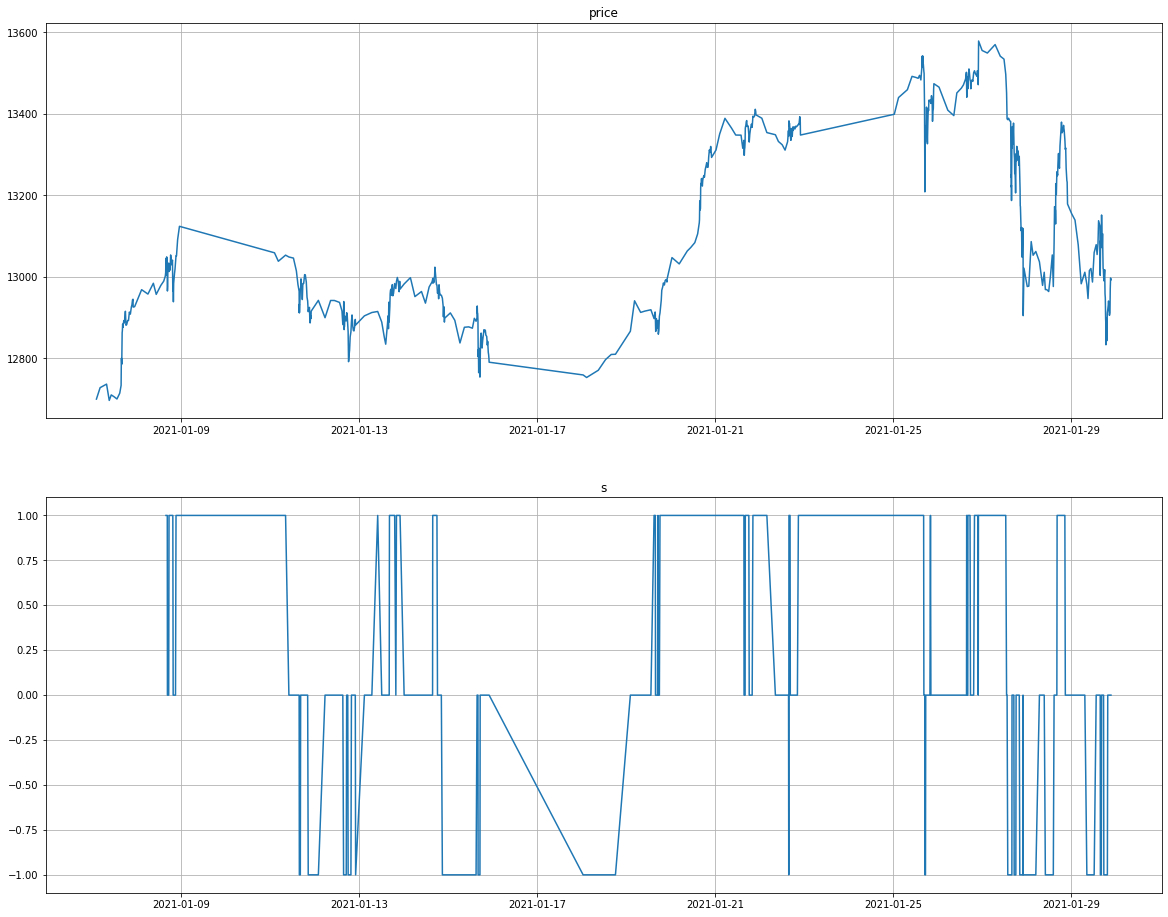

In [24]:
plot(df[['price', 's']])

In [25]:
np.floor(-1.25), np.floor(1.25)

(-2.0, 1.0)

In [26]:
a = np.array([-0.25, -.65, -.75, -1, -1.25, -1.5, 0.25, .65, .75, 1, 1.25, 1.5])

In [27]:
np.around(a, decimals=-2)

array([-0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [28]:
np.fix(a)

array([-0., -0., -0., -1., -1., -1.,  0.,  0.,  0.,  1.,  1.,  1.])

In [29]:
es = saver.read('candles_20210124_22_57_ESH1').data
del es['weighted_price']
del es['lock']
del es['pre_lock']
del es['backfill']
del es['signal']

In [30]:
es['mid'] = es.price.ewm(span=40).mean()
es['std'] = es['price'].ewm(span=40).std()
es['upper'] = es['mid'] + 2 * es['std']
es['lower'] = es['mid'] - 2 * es['std']
es.tail(15)

,open,high,low,close,price,volume,ema_fast,ema_slow,atr,filter,filtered_signal,mid,std,upper,lower
date,,,,,,,,,,,,,,,
2021-01-29 18:50:30,3697.75,3699.00,3688.25,3695.75,3695.75,44943,3767.622218,3787.454271,13.085240,-1.0,0,3743.814759,31.336622,3806.488002,3681.141516
2021-01-29 18:56:30,3695.75,3708.00,3695.25,3700.00,3700.00,43406,3766.504272,3786.886079,13.081523,-1.0,0,3741.677454,32.022550,3805.722553,3677.632355
2021-01-29 19:04:30,3699.75,3705.25,3691.25,3700.75,3700.75,43154,3765.417210,3786.326601,13.091706,-1.0,0,3739.680992,32.482906,3804.646804,3674.715181
2021-01-29 19:16:00,3700.75,3702.25,3689.50,3691.00,3691.00,44842,3764.186936,3785.707591,13.087918,-1.0,0,3737.306310,33.413340,3804.132991,3670.479629
2021-01-29 19:26:00,3690.75,3703.25,3685.50,3703.00,3703.00,44107,3763.175389,3785.170664,13.139603,-1.0,0,3735.632831,33.436520,3802.505872,3668.759791
2021-01-29 19:35:30,3703.00,3711.75,3702.00,3709.00,3709.00,44552,3762.279760,3784.676304,13.102026,-1.0,0,3734.333669,33.124322,3800.582313,3668.085024
2021-01-29 19:48:30,3708.75,3714.75,3702.25,3703.00,3703.00,43045,3761.299749,3784.146349,13.095352,-1.0,0,3732.805197,33.021543,3798.848282,3666.762112
2021-01-29 20:02:00,3703.00,3713.75,3698.25,3711.75,3711.75,44436,3760.480597,3783.676728,13.122008,-1.0,0,3731.778114,32.531968,3796.842050,3666.714179
2021-01-29 20:13:00,3711.50,3720.00,3710.25,3716.75,3716.75,44414,3759.757648,3783.242698,13.084630,-1.0,0,3731.045036,31.897511,3794.840058,3667.250014


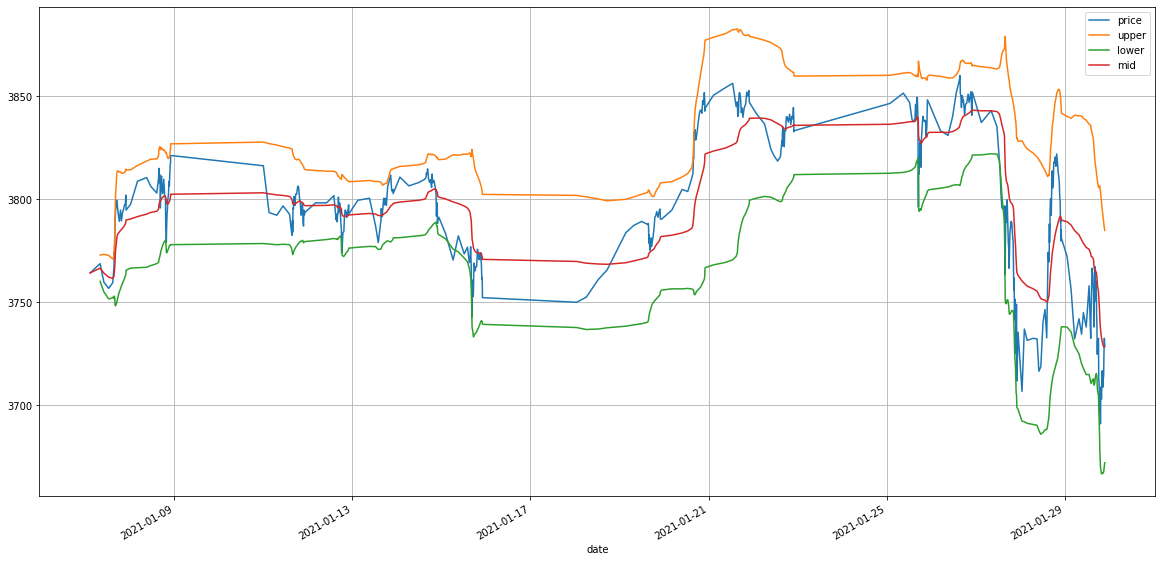

In [31]:
es[['price', 'upper', 'lower', 'mid']].plot(figsize=(20,10), grid=True);

In [32]:
es['up'] = (es['price'] > es['upper'].shift()) * 1
es['down'] = (es['price'] < es['lower'].shift()) * -1
es['signal'] = es['up'] + es['down']

In [33]:
es[es['up'] == True]

,open,high,low,close,price,volume,ema_fast,ema_slow,atr,filter,filtered_signal,mid,std,upper,lower,up,down,signal
date,,,,,,,,,,,,,,,,,,
2021-01-07 15:37:30,3767.50,3775.0,3766.50,3774.50,3774.50,45201,NaN,NaN,15.345980,NaN,0,3764.647816,6.446593,3777.541002,3751.754629,1,0,1
2021-01-07 15:57:00,3773.50,3781.0,3770.75,3780.50,3780.50,46232,NaN,NaN,13.594949,NaN,0,3767.882707,8.159295,3784.201297,3751.564116,1,0,1
2021-01-07 16:04:00,3780.25,3791.5,3780.25,3791.00,3791.00,46459,NaN,NaN,13.348557,NaN,0,3770.748220,11.056264,3792.860749,3748.635692,1,0,1
2021-01-20 16:08:00,3820.00,3829.0,3819.75,3828.25,3828.25,44042,3787.347112,3789.089514,8.595961,-1.0,0,3793.205658,19.248943,3831.703544,3754.707772,1,0,1
2021-01-20 16:18:30,3828.25,3833.5,3826.25,3833.00,3833.00,44117,3788.115084,3789.439808,8.580017,-1.0,0,3795.146856,20.683618,3836.514091,3753.779621,1,0,1


In [34]:
es['direction'] = np.sign(es['price'] - es['mid'])
es['c'] = ((es['direction'] * es['direction'].shift()) < 0) * es['direction']
es['signal'] += es['c']
es.tail(20)

,open,high,low,close,price,volume,ema_fast,ema_slow,atr,filter,filtered_signal,mid,std,upper,lower,up,down,signal,direction,c
date,,,,,,,,,,,,,,,,,,,,
2021-01-29 18:12:30,3731.50,3735.25,3728.25,3732.50,3732.50,43417,3773.166071,3790.223160,13.106551,-1.0,0,3755.257692,25.310109,3805.877911,3704.637474,0,0,0.0,-1.0,-0.0
2021-01-29 18:20:30,3732.25,3733.00,3712.00,3712.25,3712.25,43236,3772.158975,3789.715878,13.194088,-1.0,0,3753.159756,26.407944,3805.975644,3700.343868,0,0,0.0,-1.0,-0.0
2021-01-29 18:29:30,3712.25,3715.75,3708.25,3711.50,3711.50,43594,3771.156133,3789.207157,13.130944,-1.0,0,3751.127573,27.312202,3805.751977,3696.503169,0,0,0.0,-1.0,-0.0
2021-01-29 18:38:30,3711.25,3715.25,3702.25,3702.50,3702.50,44777,3770.021082,3788.643363,13.129492,-1.0,0,3748.755496,28.672342,3806.100181,3691.410812,0,0,0.0,-1.0,-0.0
2021-01-29 18:45:00,3702.50,3709.25,3697.75,3698.00,3698.00,46494,3768.830404,3788.054134,13.111423,-1.0,0,3746.279618,30.076570,3806.432758,3686.126479,0,0,0.0,-1.0,-0.0
2021-01-29 18:50:30,3697.75,3699.00,3688.25,3695.75,3695.75,44943,3767.622218,3787.454271,13.085240,-1.0,0,3743.814759,31.336622,3806.488002,3681.141516,0,0,0.0,-1.0,-0.0
2021-01-29 18:56:30,3695.75,3708.00,3695.25,3700.00,3700.00,43406,3766.504272,3786.886079,13.081523,-1.0,0,3741.677454,32.022550,3805.722553,3677.632355,0,0,0.0,-1.0,-0.0
2021-01-29 19:04:30,3699.75,3705.25,3691.25,3700.75,3700.75,43154,3765.417210,3786.326601,13.091706,-1.0,0,3739.680992,32.482906,3804.646804,3674.715181,0,0,0.0,-1.0,-0.0
2021-01-29 19:16:00,3700.75,3702.25,3689.50,3691.00,3691.00,44842,3764.186936,3785.707591,13.087918,-1.0,0,3737.306310,33.413340,3804.132991,3670.479629,0,0,0.0,-1.0,-0.0


In [35]:
df = saver.read('candles_20210113_19_10_NQH1').data

In [36]:
#df['lock'] = (((df.pre_lock.shift().rolling(40).min() + df.pre_lock.shift().rolling(40).max())) + 
#              df.pre_lock.shift()).clip(-1,1)


In [37]:
df.tail(50)

,backfill,open,high,low,close,weighted_price,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,,
2021-01-14 20:49:30,False,12955.50,12964.50,12938.75,12947.50,12950.222454,12947.50,12007,12956.163640,12941.101363,30.777090,0,1.0,0
2021-01-14 21:13:30,False,12947.25,12954.75,12922.50,12928.75,12941.294588,12928.75,12150,12947.025760,12940.897129,30.834851,-1,1.0,0
2021-01-14 21:22:30,False,12929.00,12931.50,12891.50,12902.00,12908.667498,12902.00,12027,12932.017173,12940.253954,31.194269,-1,-1.0,-1
2021-01-14 21:35:30,False,12902.25,12929.25,12896.50,12926.75,12914.414024,12926.75,12233,12930.261449,12940.030664,31.255278,0,-1.0,0
2021-01-14 21:49:00,False,12927.00,12940.00,12919.00,12920.75,12931.472813,12920.75,12414,12927.090966,12939.711857,30.853110,0,-1.0,0
2021-01-14 21:55:00,False,12920.50,12922.50,12882.50,12889.00,12899.742087,12889.00,12322,12914.393977,12938.873339,31.211811,-1,-1.0,-1
2021-01-14 22:00:00,False,12889.25,12909.25,12881.00,12898.25,12893.680789,12898.25,12274,12909.012652,12938.201638,31.095662,0,-1.0,0
2021-01-15 01:06:30,False,12898.00,12928.00,12887.75,12910.00,12903.967423,12910.00,12013,12909.341768,12937.735331,31.454656,0,-1.0,0
2021-01-15 03:30:30,False,12910.25,12923.00,12869.00,12893.50,12897.378676,12893.50,12003,12904.061178,12937.003915,32.338787,0,-1.0,0


In [38]:
        df['ema_fast'] = df.price.ewm(
            span=self.ema_fast, min_periods=int(self.ema_fast*.6)).mean()
        df['ema_slow'] = df.price.ewm(
            span=self.ema_slow, min_periods=int(self.ema_slow*.6)).mean()
        df['atr'] = indicators.atr(df, self.atr_periods)
        df['signal'] = indicators.min_max_signal(df.price, self.periods)
        df['filter'] = np.sign(df['ema_fast'] - df['ema_slow'])
        df['lock'] = -1 * (df.signal.shift().rolling(self.lock_periods).max()
                           - df.signal.shift().rolling(self.lock_periods).min())
        df['filtered_signal'] = ((df['signal'] - df['lock']) *
                                 ((df['signal'] * df['filter']) == 1))

NameError: name 'self' is not defined

In [ ]:
df['filter'] = np.sign(df['ema_fast'] - df['ema_slow'])
df['pre_lock'] = df['signal'] * ((df['signal'] * df['filter']) == 1)

df['lock'] = df.pre_lock.shift().rolling(30).min() - df.pre_lock.shift().rolling(30).max()

df['filtered_signal'] = (df['pre_lock'] * ~((df['pre_lock'] * df['lock']) == 1))

In [ ]:
df.tail(50)

In [ ]:
d.tail(50)

In [ ]:
d = saver.read('candles_20201118_11_23_NQZ0').data
del d['weighted_price']
del d['open']
del d['close']
del d['high']
del d['low']
del d['volume']

In [ ]:
d['max'] = d.signal.shift().rolling(40).max()
d['min'] = - d.signal.shift().rolling(40).min()
d['_l'] =  d.signal.shift().rolling(40).max() + d.signal.shift().rolling(40).min()

In [ ]:
d.tail(50)

In [ ]:
df = saver.read('candles_20201026_01_04_NQZ0').data

In [ ]:
df.tail(20)

In [ ]:
import numpy as np

In [ ]:
del df['weighted_price']
del df['volume']
del df['open']
del df['high']
del df['low']
del df['close']
df['shifted_signal'] = df.signal.shift()
df['lock'] = (df.signal.shift().rolling(5).max() - df.signal.shift().rolling(5).min()) * -1
df['filtered_signal'] = ((df['signal'] - df['lock']) * ((df['signal'] * df['filter']) == 1))
df.tail(50)

In [ ]:
np.invert(df['lock']

In [ ]:
df.tail(50)

In [ ]:
from arctic import Arctic
conn = Arctic('localhost')

In [ ]:
conn.list_libraries()

In [ ]:
from pymongo import MongoClient

In [ ]:
client = MongoClient()

In [ ]:
client.list_database_names()

In [ ]:
lib = conn['test']

In [ ]:
df = pd.read_csv('/home/tomek/ib_tools/backtests/backtest_2020-06-29_16-44_20180601_20191231_base.csv')

In [ ]:
df['index'] = pd.to_datetime(df['time'], utc=True)

In [ ]:
df

In [ ]:
from collections import OrderedDict

In [ ]:
data = df.to_dict('records')
data

In [ ]:
data[0]

In [ ]:
data_1 = []
for d in data:
    d.update({'index': d['sys_time']})
    data_1.append(d)

In [ ]:
data_1

In [ ]:
lib.write('blotter', [data[0]])

In [ ]:
lib.read('blotter')

In [ ]:
for row in data:
    lib.write('blotter', [row])

In [ ]:
d=lib.read('blotter')

In [ ]:
d.duplicated()

In [ ]:
lib.write('blotter2', data)

In [ ]:
lib.write('blotter1', data)

In [ ]:
lib.read('blotter1')

In [ ]:
lib.read('blotter2')

In [ ]:
lib.write('FEED::SYMBOL', data_1)

In [ ]:
conn.initialize_library('ver_test')

In [ ]:
ver = conn

In [ ]:
conn.list_libraries()

In [ ]:
from arctic.date import DateRange

In [ ]:
r = DateRange('20190101', '20190630')

In [ ]:
lib.read('blotter1', date_range=r)

In [ ]:
import pymongo

In [ ]:
from pymongo import MongoClient

In [ ]:
client = MongoClient()

In [ ]:
dir(client)

In [ ]:
client.database_names()

In [ ]:
blotter = client.blotter

In [ ]:
dir(blotter)

In [ ]:
for c in blotter.list_collections():
    print(c)

In [ ]:
b = blotter['test_blotter']

In [ ]:
for i in b.find():
    print(i)

In [ ]:
db = client['pymongo_test']

In [ ]:
blotter = db.blotter

In [ ]:
blotter.insert_one(data[0])

In [ ]:
from pprint import pprint
for i in blotter.find():
    pprint(i)

In [ ]:
for i in c:
    print(i)

In [ ]:
blotter.find_one()

In [ ]:
from ib_insync import util

In [ ]:
d = datetime(2018, 8, 20)

In [ ]:
d = pd.to_datetime('20180830')

In [ ]:
blotter.count_documents({})

In [ ]:
blotter.delete_many({})

In [ ]:
for d in data:
    blotter.insert_one(d)

In [ ]:
for i in blotter.find():
    pprint(i)

In [ ]:
n=datetime.now()
u=datetime.utcnow()

In [ ]:
n,u

In [ ]:
util.df([i for i in blotter.find()]).set_index('time')